# K Nearest Neighbors

In this notebook, we will try the model [K Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [21]:
import pickle
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

We load our data

In [22]:
path='/home/maggie/News_classifier/4.Features_Creation/' 

# data
with open(path + 'data_modified.pickle', 'rb') as file:
    data=pickle.load(file)

# features_train 
with open(path + 'features_train.pickle', 'rb') as file:
    features_train=pickle.load(file)

# features_test 
with open(path + 'features_test.pickle', 'rb') as file:
    features_test=pickle.load(file)

# y_train
with open(path + 'y_train.pickle', 'rb') as file:
    y_train=pickle.load(file)
    
# y_test
with open(path + 'y_test.pickle', 'rb') as file:
    y_test=pickle.load(file)


In [23]:
print(features_train.shape)
print(features_test.shape)

(16728, 8257)
(7170, 8257)


## Hyperparameter tuning

In [24]:
knn0 = KNeighborsClassifier()

print('Parameters:\n')
pprint(knn0.get_params())

Parameters:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


We will tune only the following parameter:

**n_neighbors** = Number of neighbors to use. 

### Grid Search Cross Validation

In [25]:
# Create the parameter grid 
#n_neighbors 
n_neighbors=[n for n in range(1,50,2)]

param_grid = {
'n_neighbors': n_neighbors}

# Base model
knn = KNeighborsClassifier()

# Grid search model
grid_search = GridSearchCV(estimator=knn, 
                            param_grid=param_grid,
                            scoring='accuracy',
                            verbose=12)

# Fit the grid search to the data
grid_search.fit(features_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START n_neighbors=1..............................................
[CV 1/5; 1/25] END ...............n_neighbors=1;, score=0.784 total time=   0.6s
[CV 2/5; 1/25] START n_neighbors=1..............................................
[CV 2/5; 1/25] END ...............n_neighbors=1;, score=0.784 total time=   0.6s
[CV 3/5; 1/25] START n_neighbors=1..............................................
[CV 3/5; 1/25] END ...............n_neighbors=1;, score=0.794 total time=   0.6s
[CV 4/5; 1/25] START n_neighbors=1..............................................
[CV 4/5; 1/25] END ...............n_neighbors=1;, score=0.791 total time=   0.6s
[CV 5/5; 1/25] START n_neighbors=1..............................................
[CV 5/5; 1/25] END ...............n_neighbors=1;, score=0.795 total time=   0.6s
[CV 1/5; 2/25] START n_neighbors=3..............................................
[CV 1/5; 2/25] END ...............n_neighbors=3

[CV 1/5; 11/25] END .............n_neighbors=21;, score=0.827 total time=   1.0s
[CV 2/5; 11/25] START n_neighbors=21............................................
[CV 2/5; 11/25] END .............n_neighbors=21;, score=0.831 total time=   1.0s
[CV 3/5; 11/25] START n_neighbors=21............................................
[CV 3/5; 11/25] END .............n_neighbors=21;, score=0.830 total time=   1.0s
[CV 4/5; 11/25] START n_neighbors=21............................................
[CV 4/5; 11/25] END .............n_neighbors=21;, score=0.824 total time=   1.0s
[CV 5/5; 11/25] START n_neighbors=21............................................
[CV 5/5; 11/25] END .............n_neighbors=21;, score=0.831 total time=   0.9s
[CV 1/5; 12/25] START n_neighbors=23............................................
[CV 1/5; 12/25] END .............n_neighbors=23;, score=0.826 total time=   0.9s
[CV 2/5; 12/25] START n_neighbors=23............................................
[CV 2/5; 12/25] END ........

[CV 2/5; 21/25] END .............n_neighbors=41;, score=0.822 total time=   1.0s
[CV 3/5; 21/25] START n_neighbors=41............................................
[CV 3/5; 21/25] END .............n_neighbors=41;, score=0.828 total time=   1.0s
[CV 4/5; 21/25] START n_neighbors=41............................................
[CV 4/5; 21/25] END .............n_neighbors=41;, score=0.821 total time=   1.0s
[CV 5/5; 21/25] START n_neighbors=41............................................
[CV 5/5; 21/25] END .............n_neighbors=41;, score=0.824 total time=   1.0s
[CV 1/5; 22/25] START n_neighbors=43............................................
[CV 1/5; 22/25] END .............n_neighbors=43;, score=0.825 total time=   1.0s
[CV 2/5; 22/25] START n_neighbors=43............................................
[CV 2/5; 22/25] END .............n_neighbors=43;, score=0.823 total time=   1.0s
[CV 3/5; 22/25] START n_neighbors=43............................................
[CV 3/5; 22/25] END ........

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49]},
             scoring='accuracy', verbose=12)

In [31]:
print("The best hyperparameters from GridSearchCV are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a KNeighborsClassifier model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from GridSearchCV are:
{'n_neighbors': 17}

The mean accuracy of a KNeighborsClassifier model with these hyperparameters is:
0.831599419961992


We save the model with the best hyperparameters

In [32]:
best_knn= grid_search.best_estimator_

## Model fit

We fit the model to the training data.

In [33]:
best_knn.fit(features_train, y_train)

KNeighborsClassifier(n_neighbors=17)

## Model performance

### - Training accuracy

In [34]:
print("The training accuracy  is: ")
accuracy_train=accuracy_score(y_train,best_knn.predict(features_train))
print(accuracy_train)

The training accuracy  is: 
0.8580224772835964


### - Test accuracy

In [35]:
print("The test accuracy is: ")
knn_pred=best_knn.predict(features_test)
accuracy_test=accuracy_score(y_test, knn_pred)
print(accuracy_test)

The test accuracy is: 
0.8357043235704323


### - Classification report and confusion matrix

Classification report
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       904
           1       0.95      0.94      0.94      1448
           2       0.82      0.85      0.83      1276
           3       0.79      0.81      0.80      1073
           4       0.81      0.80      0.81      1392
           5       0.75      0.73      0.74      1077

    accuracy                           0.84      7170
   macro avg       0.83      0.83      0.83      7170
weighted avg       0.84      0.84      0.84      7170



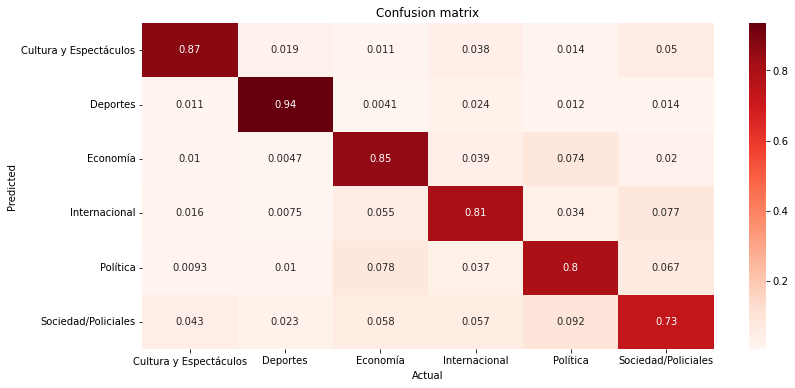

In [36]:
#Classification report
print("Classification report")
print(classification_report(y_test,knn_pred))

#Confusion matrix
aux_data = data[['Label', 'Label_code']].drop_duplicates().sort_values('Label_code')
conf_matrix = confusion_matrix(y_test, knn_pred,normalize='true')
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, annot=True,
            xticklabels=aux_data['Label'], 
            yticklabels=aux_data['Label'],
            cmap="Reds")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

We save the model.


In [37]:
with open('best_knn.pickle', 'wb') as output:
    pickle.dump(best_knn, output)

We also save the scores for the different metrics we considered. In the case of precision, recall and F1-score we use macro average (averaging the unweighted mean per label).

In [38]:
classification_report_macro=classification_report(y_test,knn_pred,output_dict=True)['macro avg']
scores_knn = {
     'Model': 'K Nearest Neighbors',
     'Training Set Accuracy': accuracy_train,
     'Test Set Accuracy': accuracy_test,
     'Precision':classification_report_macro['precision'],
    'Recall':classification_report_macro['recall'],
    'F1-score':classification_report_macro['f1-score']
}

In [39]:
scores_knn

{'Model': 'K Nearest Neighbors',
 'Training Set Accuracy': 0.8580224772835964,
 'Test Set Accuracy': 0.8357043235704323,
 'Precision': 0.8325747572017033,
 'Recall': 0.8321209762441376,
 'F1-score': 0.8322127536792338}

In [40]:
with open('scores_knn.pickle', 'wb') as handle:
    pickle.dump(scores_knn, handle, protocol=pickle.HIGHEST_PROTOCOL)